Name :Ayuti Shivdavkar <br>
Dataset :Iris Dataset

In [147]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving iris.data to iris (5).data
User uploaded file "iris.data" with length 4551 bytes


In [148]:
import pandas as pd
import io
data=pd.read_csv(io.StringIO(uploaded['iris.data'].decode('utf-8')))
data.head(25)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [149]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model




In [150]:
dataset = pd.read_csv("iris.data")
dataset

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [151]:
dataset.shape

(149, 5)

Iris-setosa 50
Iris-versicolor 50
Iris-virginica 49


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


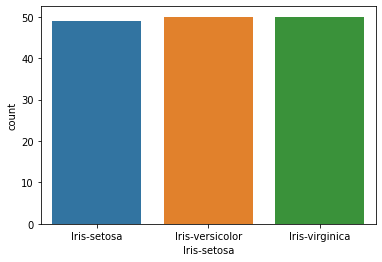

In [152]:

ax = sns.countplot(dataset['Iris-setosa'], label= 'Count')
A,B,C = dataset['Iris-setosa'].value_counts()
print('Iris-setosa', A)
print('Iris-versicolor', B)
print('Iris-virginica', C)


In [153]:
X = dataset.iloc[:,0:4].values
y = dataset.iloc[:,4].values


In [154]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values



In [155]:
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [156]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [157]:
model = Sequential()

model.add(Dense(4,input_shape=(4,), activation='relu'))

model.add(Dense(3, activation='softmax'))


In [158]:
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [159]:

hist=model.fit(X_train, y_train, batch_size=10, epochs=150)



Epoch 1/150
12/12 [==============================] - 0s 1ms/step - loss: 1.0863 - accuracy: 0.3320
Epoch 2/150
12/12 [==============================] - 0s 2ms/step - loss: 1.0675 - accuracy: 0.3569
Epoch 3/150
12/12 [==============================] - 0s 2ms/step - loss: 1.0451 - accuracy: 0.2978
Epoch 4/150
12/12 [==============================] - 0s 2ms/step - loss: 1.0541 - accuracy: 0.3571
Epoch 5/150
12/12 [==============================] - 0s 1ms/step - loss: 1.0648 - accuracy: 0.3070
Epoch 6/150
12/12 [==============================] - 0s 1ms/step - loss: 1.0429 - accuracy: 0.3214
Epoch 7/150
12/12 [==============================] - 0s 1ms/step - loss: 1.0243 - accuracy: 0.3745
Epoch 8/150
12/12 [==============================] - 0s 1ms/step - loss: 1.0313 - accuracy: 0.3358
Epoch 9/150
12/12 [==============================] - 0s 1ms/step - loss: 1.0432 - accuracy: 0.3368
Epoch 10/150
12/12 [==============================] - 0s 1ms/step - loss: 1.0245 - accuracy: 0.3756
Epoch 11/

In [160]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [161]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))
cm=confusion_matrix(y_test_class,y_pred_class)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.20      0.33        10
           2       0.50      1.00      0.67         8

    accuracy                           0.73        30
   macro avg       0.83      0.73      0.67        30
weighted avg       0.87      0.73      0.69        30

[[12  0  0]
 [ 0  2  8]
 [ 0  0  8]]


In [162]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_class,y_pred_class)

0.7333333333333333

In [163]:

# Get the accuracy of test data set
#
test_loss, test_acc = model.evaluate(X_test, y_test)
#
# Print the test accuracy
#
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)

1/1 [==============================] - 0s 120ms/step - loss: 0.5083 - accuracy: 0.7333
Test Accuracy:  0.7333333492279053 
Test Loss:  0.5082598924636841


In [170]:

history_dict = hist.history
print(history_dict.keys())


dict_keys(['loss', 'accuracy'])
